In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.14.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


# 对句子不使用嵌入，而是进行多热编码。该模型将很快过拟合训练集
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

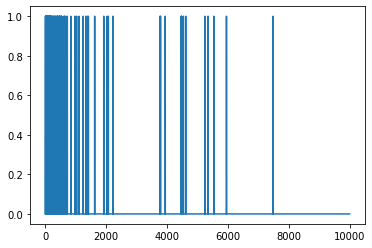

In [3]:
# 展示第一个多热向量， 字词索引按频率排序，因此索引0附近应该有更多的1值
plt.plot(train_data[0])

In [5]:
# 防止过拟合，最简单的方法是缩小模型，即减少模型中可学习参数的数量（层数和每层的单元数，可称作模型的"容量"）
# 参数越多的模型"记忆容量"越大，因此能够轻松学习训练样本与其目标之间的字典式完美映射（无任何泛化能力的映射）
# 若要对之前从未见过的数据作出预测，这种映射毫无作用
# 谨记： 深度学习模型往往善于与训练数据拟合，但真正的挑战是泛化，而非拟合
# 如果网络的记忆资源有限，便无法轻松学习映射。为了最小化损失，它必须学习具有更强预测能力的压缩表示法。
# 如果模型太小，将难以与训练数据拟合。 需要在"容量太多"和"容量不足"之间实现平衡
# 要找到合适的模型大小，最好先使用相对较少的层和参数，然后逐渐增加层的大小和添加新的层数，直到看到返回的验证损失不断减小为止

# 仅使用Dense层创建一个简单的基准模型，然后创建更小和更大的版本，并比较这些版本
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', 
                       metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

W0807 17:12:38.970618 4725200320 deprecation.py:323] From /Users/skylar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, 
                                      validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.4587 - acc: 0.8135 - binary_crossentropy: 0.4587 - val_loss: 0.3171 - val_acc: 0.8790 - val_binary_crossentropy: 0.3171
Epoch 2/20
25000/25000 - 4s - loss: 0.2342 - acc: 0.9162 - binary_crossentropy: 0.2342 - val_loss: 0.2839 - val_acc: 0.8880 - val_binary_crossentropy: 0.2839
Epoch 3/20
25000/25000 - 2s - loss: 0.1739 - acc: 0.9389 - binary_crossentropy: 0.1739 - val_loss: 0.2976 - val_acc: 0.8822 - val_binary_crossentropy: 0.2976
Epoch 4/20
25000/25000 - 2s - loss: 0.1426 - acc: 0.9518 - binary_crossentropy: 0.1426 - val_loss: 0.3393 - val_acc: 0.8701 - val_binary_crossentropy: 0.3393
Epoch 5/20
25000/25000 - 2s - loss: 0.1174 - acc: 0.9614 - binary_crossentropy: 0.1174 - val_loss: 0.3447 - val_acc: 0.8734 - val_binary_crossentropy: 0.3447
Epoch 6/20
25000/25000 - 2s - loss: 0.0953 - acc: 0.9716 - binary_crossentropy: 0.0953 - val_loss: 0.3744 - val_acc: 0.8700 - val_binary_crossentropy: 0.3744
Ep

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
# verbose :1 ：显示进度条2：为每个epoch输出一行记录
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.5693 - acc: 0.7654 - binary_crossentropy: 0.5693 - val_loss: 0.4459 - val_acc: 0.8512 - val_binary_crossentropy: 0.4459
Epoch 2/20
25000/25000 - 5s - loss: 0.3503 - acc: 0.8890 - binary_crossentropy: 0.3503 - val_loss: 0.3394 - val_acc: 0.8779 - val_binary_crossentropy: 0.3394
Epoch 3/20
25000/25000 - 2s - loss: 0.2639 - acc: 0.9135 - binary_crossentropy: 0.2639 - val_loss: 0.3037 - val_acc: 0.8836 - val_binary_crossentropy: 0.3037
Epoch 4/20
25000/25000 - 3s - loss: 0.2186 - acc: 0.9279 - binary_crossentropy: 0.2186 - val_loss: 0.2885 - val_acc: 0.8873 - val_binary_crossentropy: 0.2885
Epoch 5/20
25000/25000 - 2s - loss: 0.1884 - acc: 0.9376 - binary_crossentropy: 0.1884 - val_loss: 0.2841 - val_acc: 0.8873 - val_binary_crossentropy: 0.2841
Epoch 6/20
25000/25000 - 2s - loss: 0.1670 - acc: 0.9454 - binary_crossentropy: 0.1670 - val_loss: 0.2862 - val_acc: 0.8852 - val_binary_crossentropy: 0.2862
Ep

In [9]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                  validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.3498 - acc: 0.8505 - binary_crossentropy: 0.3498 - val_loss: 0.3008 - val_acc: 0.8762 - val_binary_crossentropy: 0.3008
Epoch 2/20
25000/25000 - 9s - loss: 0.1471 - acc: 0.9464 - binary_crossentropy: 0.1471 - val_loss: 0.3382 - val_acc: 0.8720 - val_binary_crossentropy: 0.3382
Epoch 3/20
25000/25000 - 7s - loss: 0.0502 - acc: 0.9860 - binary_crossentropy: 0.0502 - val_loss: 0.4439 - val_acc: 0.8690 - val_binary_crossentropy: 0.4439
Epoch 4/20
25000/25000 - 7s - loss: 0.0073 - acc: 0.9989 - binary_crossentropy: 0.0073 - val_loss: 0.5859 - val_acc: 0.8676 - val_binary_crossentropy: 0.5859
Epoch 5/20
25000/25000 - 7s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6651 - val_acc: 0.8709 - val_binary_crossentropy: 0.6651
Epoch 6/20
25000/25000 - 7s - loss: 2.6517e-04 - acc: 1.0000 - binary_crossentropy: 2.6517e-04 - val_loss: 0.7139 - val_acc: 0.8711 - val_binary_crossentropy: 

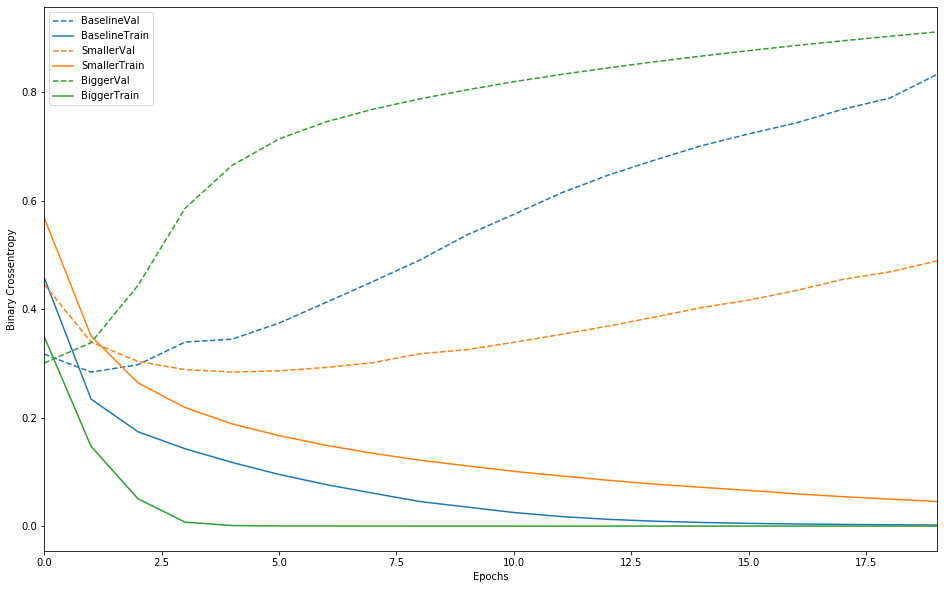

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+'Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+'Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

# 看虚线部分，baseline和bigger大概在一个周期后就开始过拟合。
# 网络容量越大，便能够越快对训练数据进行建模（产生较低的训练损失），但越容易过拟合（导致训练损失与验证损失之间的差异很大）

In [13]:
# 添加权重正则化
# 要缓解过拟合，一种常见方法是限制网络的复杂性，具体方法是强制要求其权重仅采用较小的值，使权重值的分布更"规则"，
# 这称为"权重正则化"，通过向网络的损失函数添加与权重较大相关的代价来实现。 
# 代价分为两种类型：
# L1正则化，其中所添加的代价与权重系数的绝对值（即所谓的权重"L1范数"）成正比
# L2正则化，其中所添加的代价与权重系数值的平方（即所谓的权重"L2范数"）成正比，在神经网络领域也称为权重衰减
# 在tf.keras中，权重正则化的添加方法：将权重正则化项实例作为关键字参数传递给下一层
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.5108 - acc: 0.8155 - binary_crossentropy: 0.4720 - val_loss: 0.3715 - val_acc: 0.8795 - val_binary_crossentropy: 0.3318
Epoch 2/20
25000/25000 - 4s - loss: 0.2975 - acc: 0.9106 - binary_crossentropy: 0.2542 - val_loss: 0.3324 - val_acc: 0.8866 - val_binary_crossentropy: 0.2864
Epoch 3/20
25000/25000 - 2s - loss: 0.2482 - acc: 0.9305 - binary_crossentropy: 0.2001 - val_loss: 0.3335 - val_acc: 0.8859 - val_binary_crossentropy: 0.2839
Epoch 4/20
25000/25000 - 2s - loss: 0.2261 - acc: 0.9404 - binary_crossentropy: 0.1749 - val_loss: 0.3455 - val_acc: 0.8817 - val_binary_crossentropy: 0.2932
Epoch 5/20
25000/25000 - 2s - loss: 0.2112 - acc: 0.9476 - binary_crossentropy: 0.1579 - val_loss: 0.3562 - val_acc: 0.8786 - val_binary_crossentropy: 0.3021
Epoch 6/20
25000/25000 - 2s - loss: 0.2000 - acc: 0.9524 - binary_crossentropy: 0.1449 - val_loss: 0.3669 - val_acc: 0.8764 - val_binary_crossentropy: 0.3113
Ep

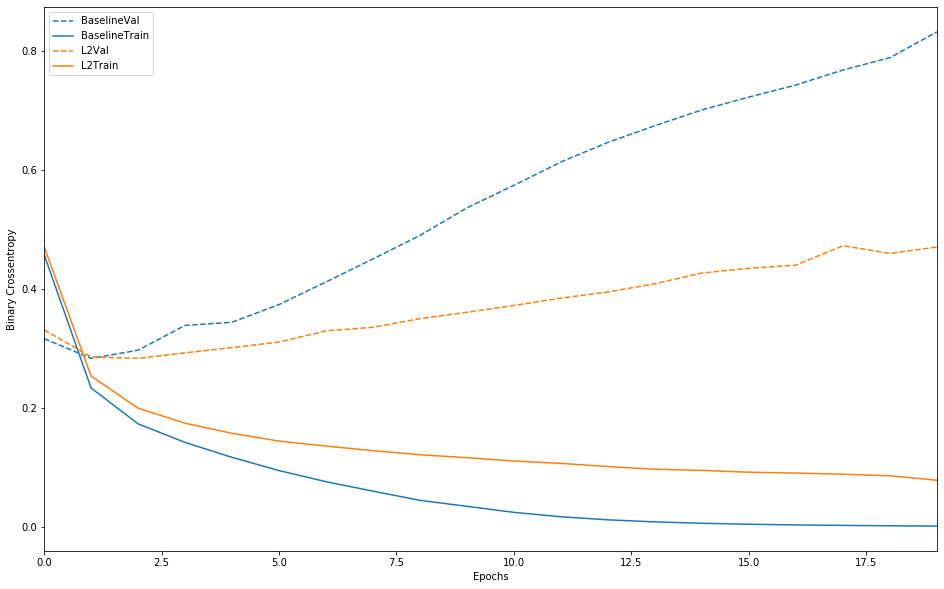

In [14]:
# l2(0.001)表示层的权重矩阵中的每个系数都会将0.001*weight_coefficient_value**2添加到网络的总损失中。由于此惩罚
# 仅在训练时添加，此网络在训练时的损失将远高于测试时。
# 以下时L2正则化惩罚的影响：
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [15]:
# 可以看出，L2正则化模型的过拟合抵抗能力比基准模型强得多，虽然这两个模型的参数数量相同。

In [16]:
# 添加丢弃层
# 丢弃（应用于某个层）是指在训练期间随机"丢弃"（即设置为0）该层的多个输出特征。
# "丢弃率"指变为0的特征所占的比例，通常设置在0.2-0.5。在测试时，网络不会丢弃任何单元，
# 而是将层的输出值按等同于丢弃率的比例进行缩减，以平衡以下事实：测试时的活跃单元数大于训练时的活跃单元数
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                  validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.6223 - acc: 0.6395 - binary_crossentropy: 0.6223 - val_loss: 0.4792 - val_acc: 0.8513 - val_binary_crossentropy: 0.4792
Epoch 2/20
25000/25000 - 5s - loss: 0.4644 - acc: 0.7987 - binary_crossentropy: 0.4644 - val_loss: 0.3414 - val_acc: 0.8804 - val_binary_crossentropy: 0.3414
Epoch 3/20
25000/25000 - 3s - loss: 0.3569 - acc: 0.8680 - binary_crossentropy: 0.3569 - val_loss: 0.2904 - val_acc: 0.8853 - val_binary_crossentropy: 0.2904
Epoch 4/20
25000/25000 - 2s - loss: 0.2914 - acc: 0.8975 - binary_crossentropy: 0.2914 - val_loss: 0.2775 - val_acc: 0.8859 - val_binary_crossentropy: 0.2775
Epoch 5/20
25000/25000 - 2s - loss: 0.2418 - acc: 0.9194 - binary_crossentropy: 0.2418 - val_loss: 0.2804 - val_acc: 0.8880 - val_binary_crossentropy: 0.2804
Epoch 6/20
25000/25000 - 3s - loss: 0.2037 - acc: 0.9314 - binary_crossentropy: 0.2037 - val_loss: 0.2922 - val_acc: 0.8845 - val_binary_crossentropy: 0.2922
Ep

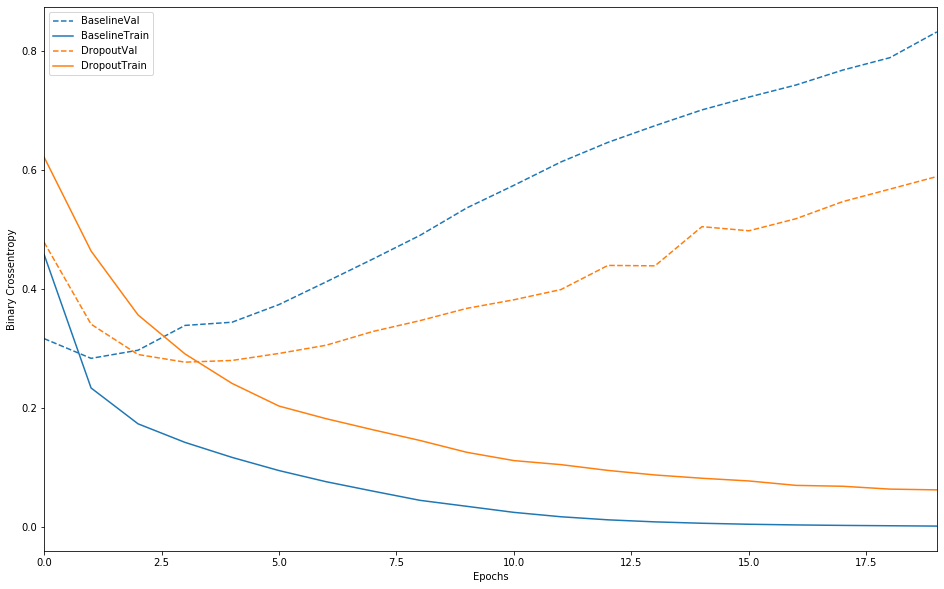

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [ ]:
# 添加丢弃层可明显改善基准模型

# 总结以下防止神经网络出现过拟合的最常见方法：
# 1.获取更多训练数据 2.降低网络容量 3.添加权重正则化 4.添加丢弃层 
# 还有两种重要的方法： 数据增强、 批次归一化